In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the data:
```
Location - Name of the city from Australia.
MinTemp - The Minimum temperature during a particular day. (degree Celsius)
MaxTemp - The maximum temperature during a particular day. (degree Celsius)
Rainfall - Rainfall during a particular day. (millimeters)
Evaporation - Evaporation during a particular day. (millimeters)
Sunshine - Bright sunshine during a particular day. (hours)
WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
Humidity9am - The humidity of the wind at 9 am. (percent)
Humidity3pm - The humidity of the wind at 3 pm. (percent)
Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
Temp9am - The temperature at 9 am. (degree Celsius)
Temp3pm - The temperature at 3 pm. (degree Celsius)
RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).
```

In [2]:
df = pd.read_csv('weatherAUS.csv')
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [3]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [4]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [5]:
Y = Y.reshape(-1,1)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [7]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [8]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [9]:
df.dtypes.info

<bound method Series.info of Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object>

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [11]:
numeric_df.dtypes.info

<bound method Series.info of MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
dtype: object>

# 1. Correlation Heatmap

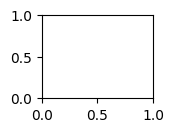

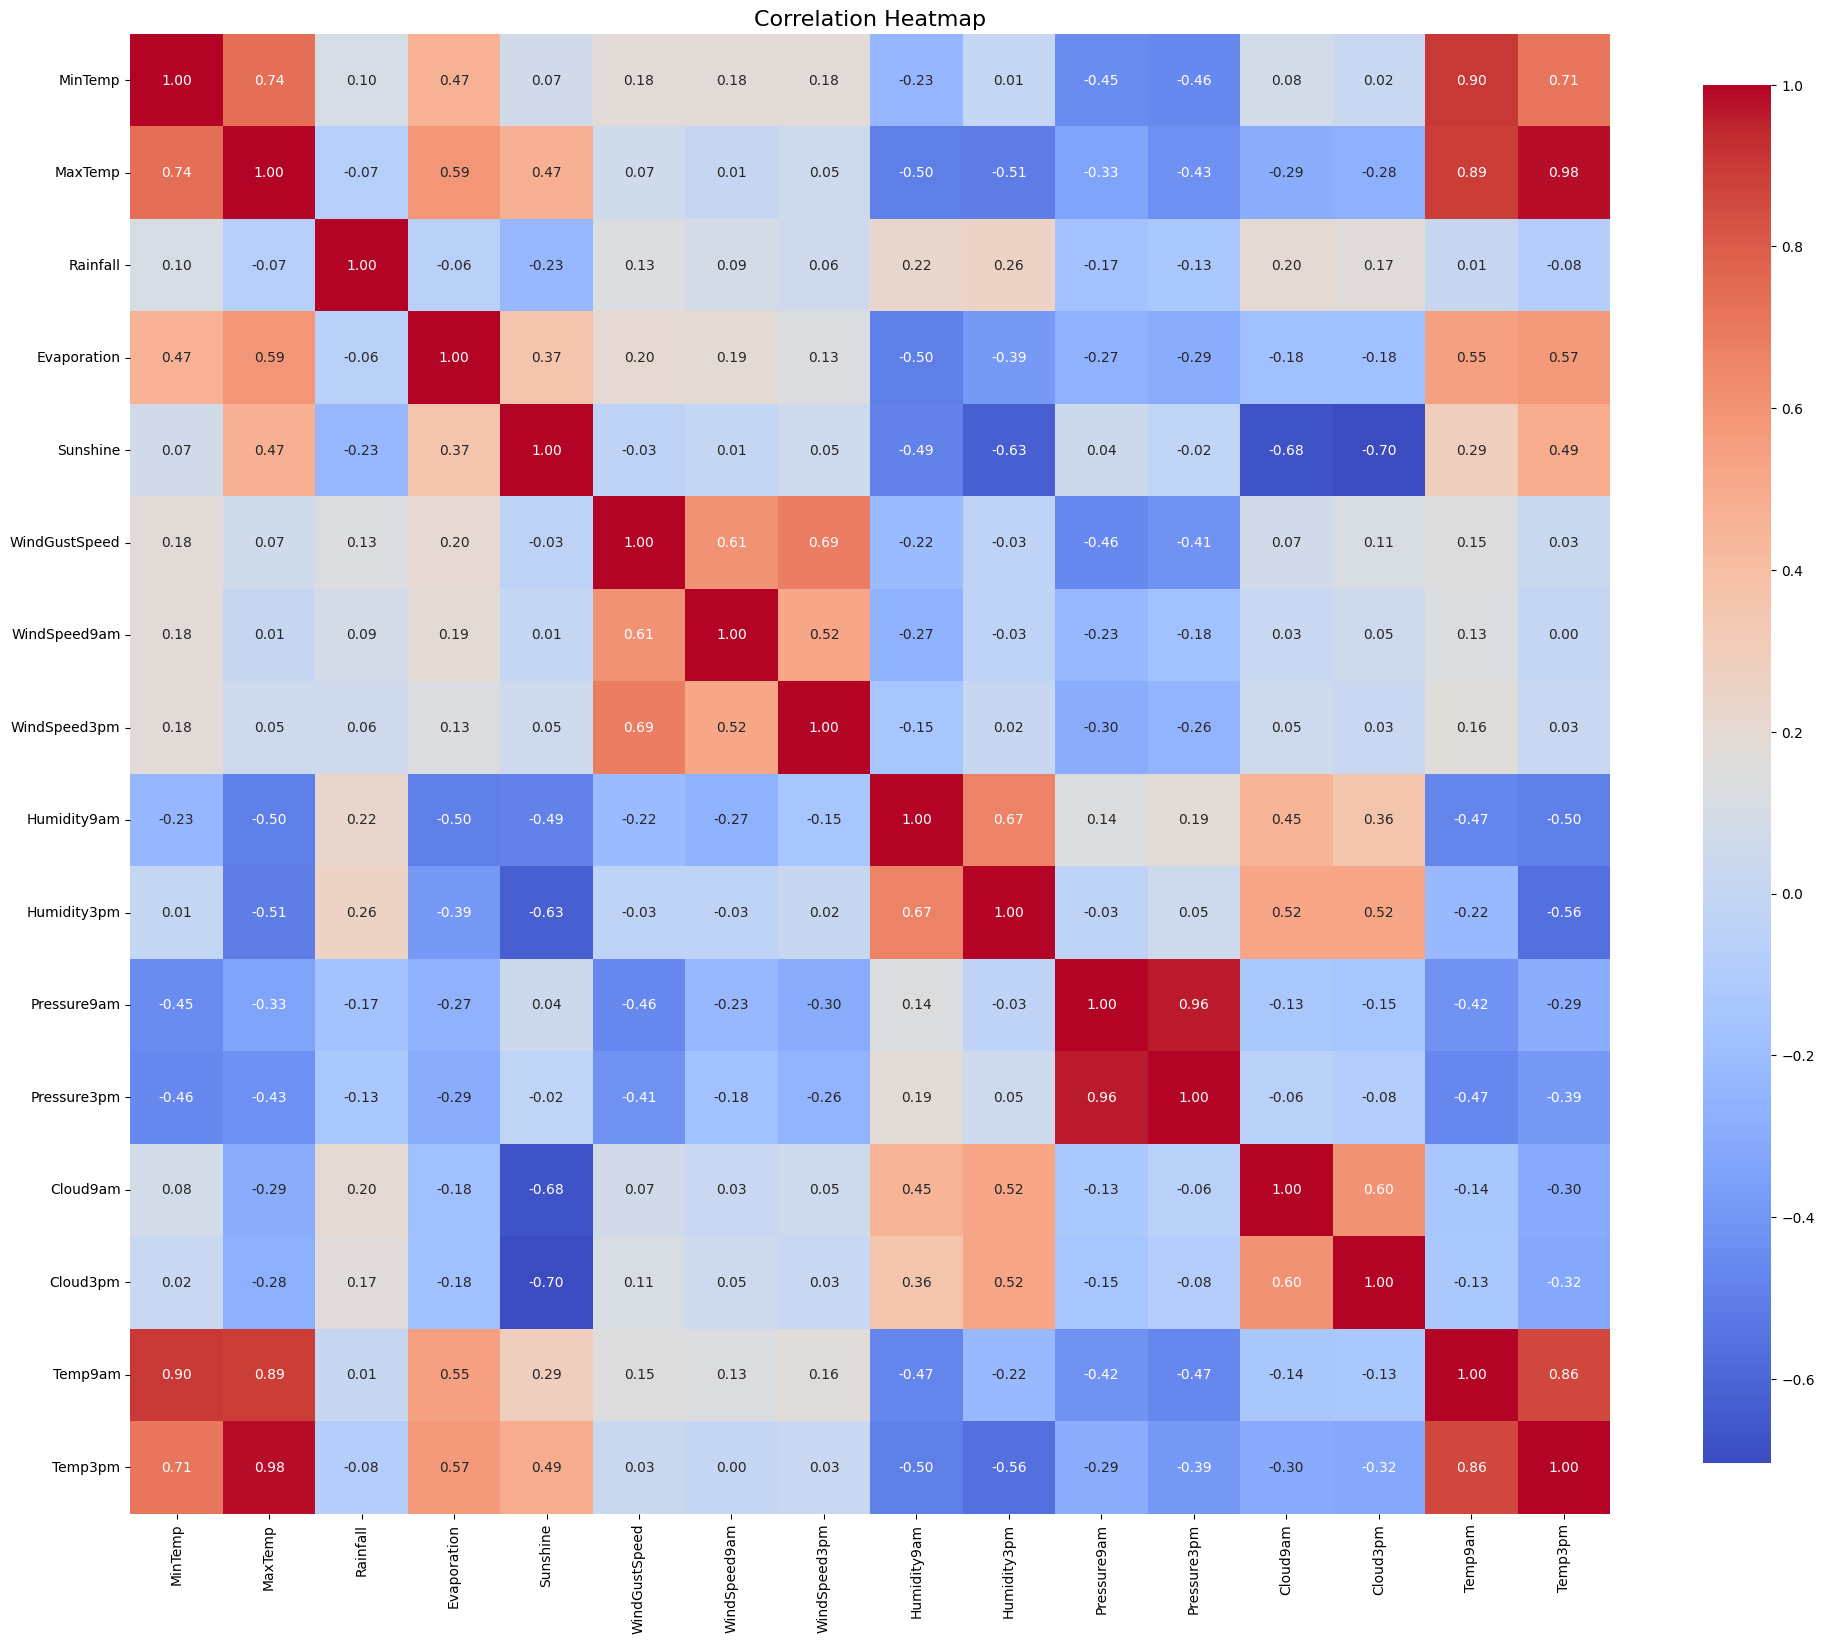

In [12]:

plt.subplot(4, 4, 1)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust subplot parameters for better spacing
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20, 18))  # Increase the overall figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={'shrink': .8}, annot_kws={"size": 10})  # Adjust colorbar and annotation size
plt.title('Correlation Heatmap', fontsize=16)  # Increase title font size
plt.tight_layout()


# 2. Box Plot for Rainfall by RainTomorrow

Text(0, 0.5, 'Rainfall (mm)')

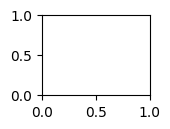

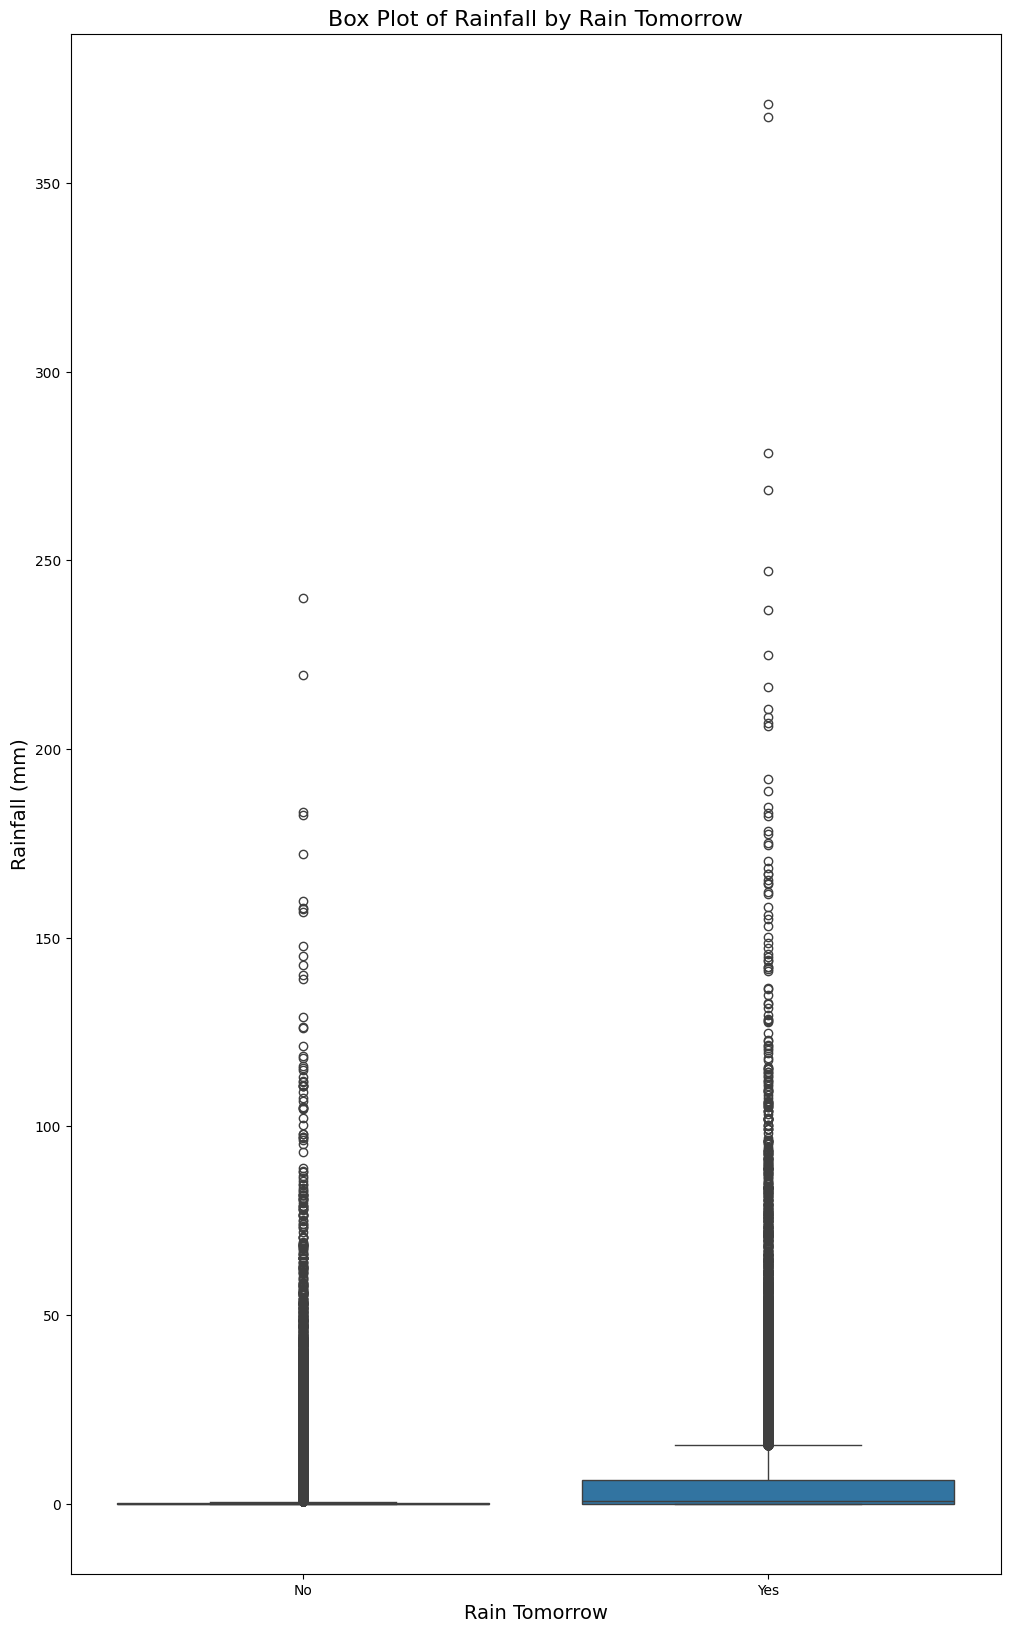

In [13]:

plt.subplot(4, 4, 2)
plt.figure(figsize=(12, 20))  # Increase the overall figure size
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Box Plot of Rainfall by Rain Tomorrow', fontsize=16)
plt.xlabel('Rain Tomorrow', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)


# 3. Violin Plot for Rainfall by RainTomorrow

Text(0, 0.5, 'Rainfall (mm)')

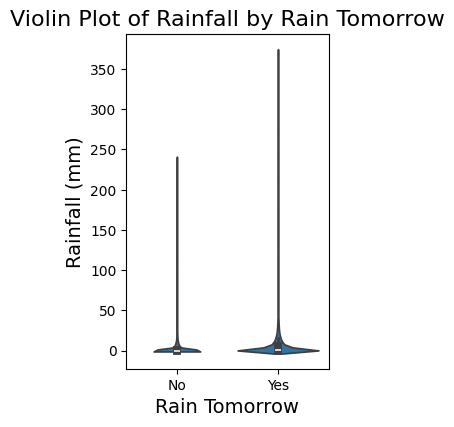

In [14]:


plt.figure(figsize=(12, 20))  # Increase the overall figure size
plt.subplot(4, 4, 3)
sns.violinplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Violin Plot of Rainfall by Rain Tomorrow', fontsize=16)
plt.xlabel('Rain Tomorrow', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)

# 4. Bar Chart of Average Rainfall by Location

Text(0, 0.5, 'Average Rainfall (mm)')

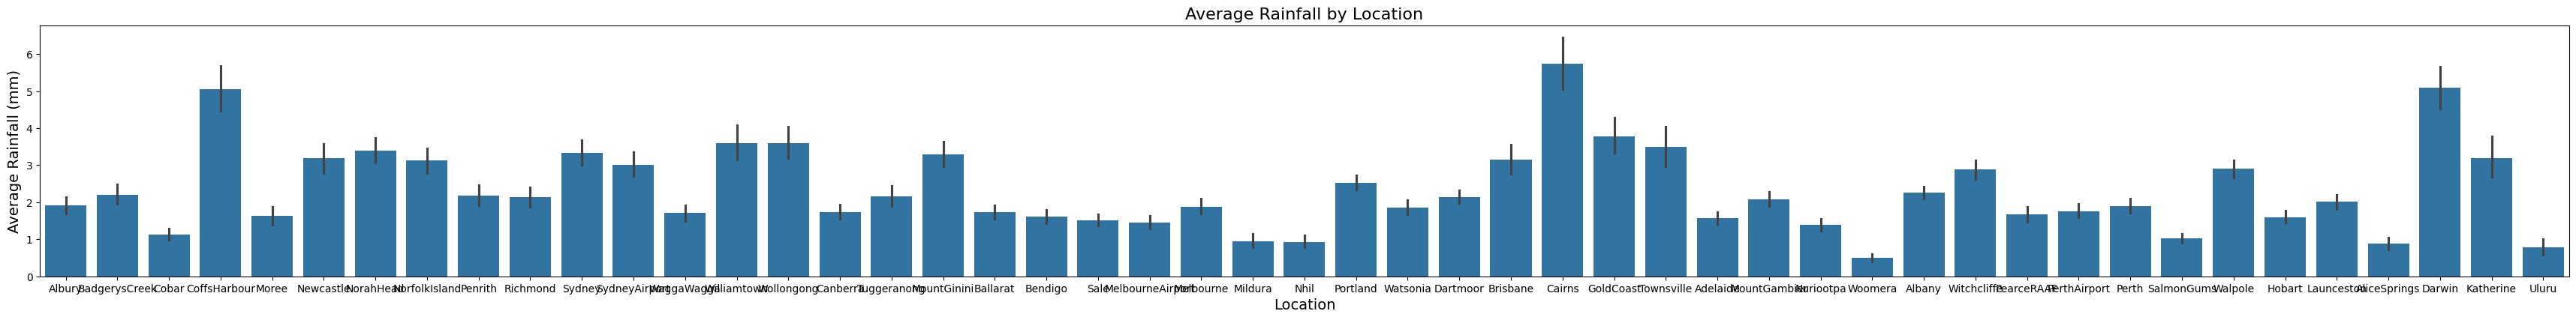

In [15]:
plt.figure(figsize=(200, 20))  # Increase the overall figure size
plt.subplot(4, 4, 4)
sns.barplot(x='Location', y='Rainfall', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Rainfall by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)

# 5. Scatter Plot of Rainfall vs MinTemp

Text(0, 0.5, 'Rainfall (mm)')

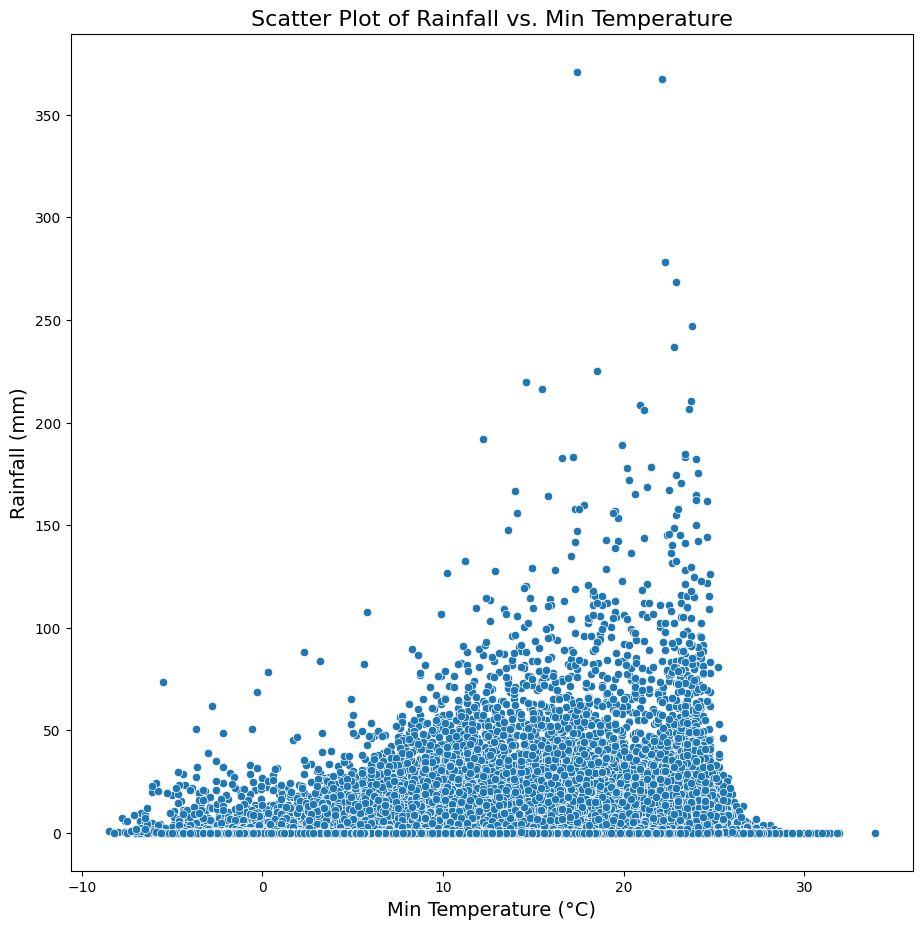

In [16]:
plt.figure(figsize=(50, 50))  # Increase the overall figure size
plt.subplot(4, 4, 5)
sns.scatterplot(x='MinTemp', y='Rainfall', data=df)
plt.title('Scatter Plot of Rainfall vs. Min Temperature', fontsize=16)
plt.xlabel('Min Temperature (°C)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)

# 6. Scatter Plot of Rainfall vs MaxTemp

Text(0, 0.5, 'Rainfall (mm)')

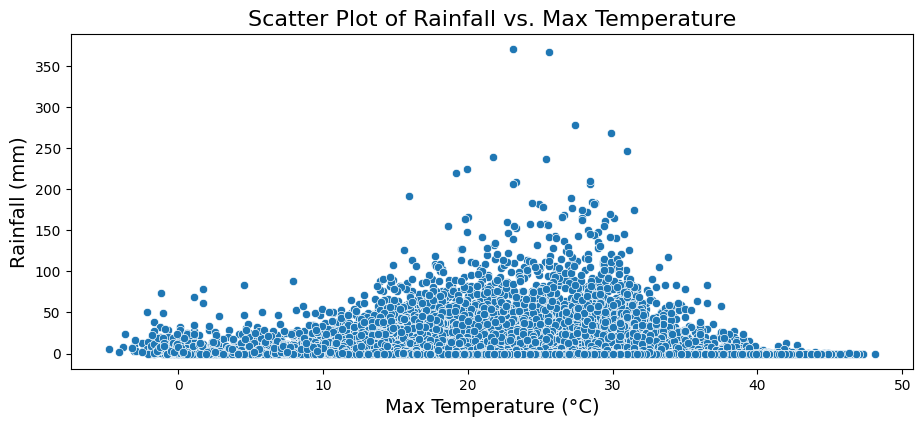

In [17]:
plt.figure(figsize=(50, 20))  # Increase the overall figure size
plt.subplot(4, 4, 6)
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df)
plt.title('Scatter Plot of Rainfall vs. Max Temperature', fontsize=16)
plt.xlabel('Max Temperature (°C)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)

# 7. Scatter Plot of Rainfall vs Humidity9am

Text(0, 0.5, 'Rainfall (mm)')

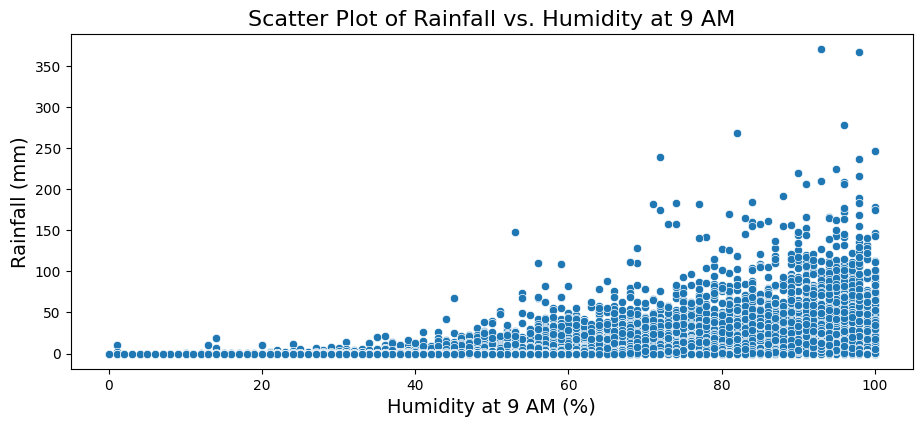

In [18]:
plt.figure(figsize=(50, 20))  # Increase the overall figure size
plt.subplot(4, 4, 7)
sns.scatterplot(x='Humidity9am', y='Rainfall', data=df)
plt.title('Scatter Plot of Rainfall vs. Humidity at 9 AM', fontsize=16)
plt.xlabel('Humidity at 9 AM (%)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)


# 8. Scatter Plot of Rainfall vs WindGustSpeed

Text(0, 0.5, 'Rainfall (mm)')

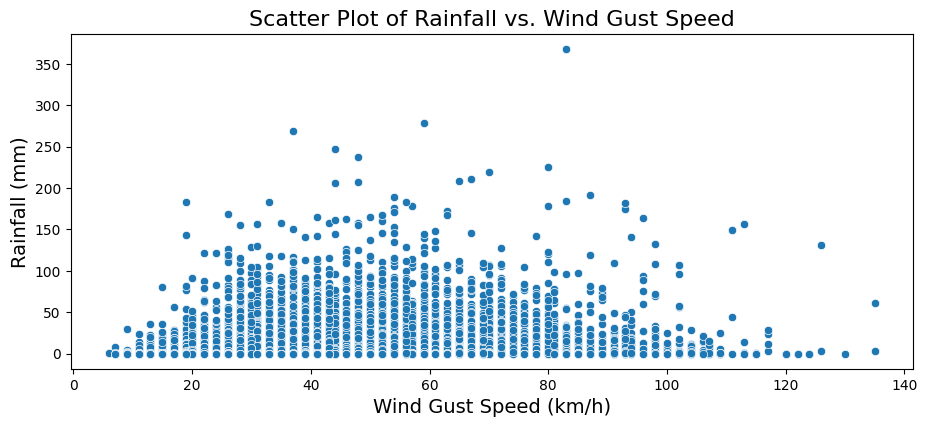

In [19]:
plt.figure(figsize=(50, 20)) 
plt.subplot(4, 4, 8)
sns.scatterplot(x='WindGustSpeed', y='Rainfall', data=df)
plt.title('Scatter Plot of Rainfall vs. Wind Gust Speed', fontsize=16)
plt.xlabel('Wind Gust Speed (km/h)', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)

# 9. Histogram of MinTemp

Text(0, 0.5, 'Frequency')

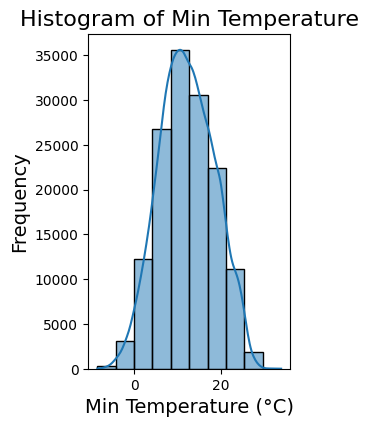

In [20]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 4, 9)
sns.histplot(df['MinTemp'], bins=10, kde=True)
plt.title('Histogram of Min Temperature', fontsize=16)
plt.xlabel('Min Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# 10. Histogram of MaxTemp

Text(0, 0.5, 'Frequency')

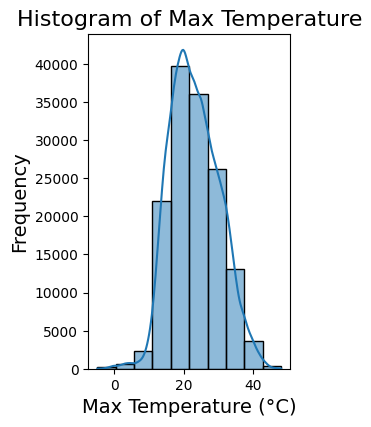

In [21]:
plt.figure(figsize=(12, 20))  # Increase the overall figure size
plt.subplot(4, 4, 10)
sns.histplot(df['MaxTemp'], bins=10, kde=True)
plt.title('Histogram of Max Temperature', fontsize=16)
plt.xlabel('Max Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# 11. Count Plot of RainToday

Text(0, 0.5, 'Count')

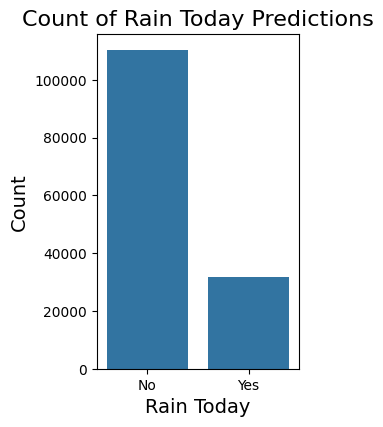

In [22]:
plt.figure(figsize=(12, 20))  # Increase the overall figure size
plt.subplot(4, 4, 11)
sns.countplot(x='RainToday', data=df)
plt.title('Count of Rain Today Predictions', fontsize=16)
plt.xlabel('Rain Today', fontsize=14)
plt.ylabel('Count', fontsize=14)


# 12. Count Plot of RainTomorrow

Text(0, 0.5, 'Count')

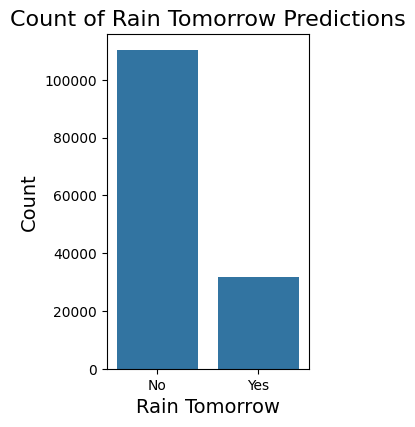

In [23]:
plt.figure(figsize=(12, 20))  # Increase the overall figure size
plt.subplot(4, 4, 12)
sns.countplot(x='RainTomorrow', data=df)
plt.title('Count of Rain Tomorrow Predictions', fontsize=16)
plt.xlabel('Rain Tomorrow', fontsize=14)
plt.ylabel('Count', fontsize=14)


In [24]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [27]:
# Fill numeric columns with the mean
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/yc/y29rh9511z7fcs0k55zst45h0000gn/T/ipykernel_14386/225781804.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [28]:
# Fill object columns with NaN (if not already NaN)
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].replace(['', None], np.nan, inplace=True)  # Convert empty strings and None to NaN

/var/folders/yc/y29rh9511z7fcs0k55zst45h0000gn/T/ipykernel_14386/3709214435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(['', None], np.nan, inplace=True)  # Convert empty strings and None to NaN


In [29]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 if weekend, 0 otherwise


In [30]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int32
Month                     int32
Day                       int32
DayOfWeek                 int32
IsWeekend                 int64
dtype: object

In [31]:
# Removing Evaporation, Sunshine, WindDir9am  as they have more missing values
df = df.drop('Evaporation', axis=1)
df = df.drop('Sunshine', axis=1)
df = df.drop('WindDir9am', axis=1)
df = df.drop('Date', axis=1)

In [32]:
df['Location'].nunique()

49

In [33]:
# One-hot encode the 'Location' column
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [34]:
df['WindGustDir'].nunique()

16

In [35]:
# One-hot encode the 'WindGustDir' column
df = pd.get_dummies(df, columns=['WindGustDir'], drop_first=True)

In [36]:
# One-hot encode the 'WindDir3pm' column
df = pd.get_dummies(df, columns=['WindDir3pm'], drop_first=True)

In [37]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert all boolean columns to int
df[bool_cols] = df[bool_cols].astype(int)


In [38]:
df.dtypes.all

<bound method Series.all of MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustSpeed     float64
WindSpeed9am      float64
                   ...   
WindDir3pm_SSW      int64
WindDir3pm_SW       int64
WindDir3pm_W        int64
WindDir3pm_WNW      int64
WindDir3pm_WSW      int64
Length: 99, dtype: object>

In [39]:
# Apply label encoding to the 'RainToday' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['RainToday_endoced'] = label_encoder.fit_transform(df['RainToday'])
df = df.drop('RainToday', axis=1)

In [40]:
# Apply label encoding to the 'RainTomorrow' column
df['RainTomorrow_endoced'] = label_encoder.fit_transform(df['RainTomorrow'])
df = df.drop('RainTomorrow', axis=1)

In [41]:
df.dtypes

MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
                         ...   
WindDir3pm_W              int64
WindDir3pm_WNW            int64
WindDir3pm_WSW            int64
RainToday_endoced         int64
RainTomorrow_endoced      int64
Length: 99, dtype: object

In [42]:
# Save the DataFrame to a CSV file
df.to_csv('aus_weather.csv', index=False)

## Based on the EDA we have decided to go with the following steps:

* Standardization of Data Columns like MinTemprature, MaxTemprature
* Encoding Target Variable 
* Split your dataset into training and testing sets to evaluate model performance later.
* Convert Categorical Variables: Encode categorical variables (e.g., Location, WindGustDir, RainToday, RainTomorrow) using:
   * Label Encoding: For ordinal categories.
   * One-Hot Encoding: For nominal categories.


### Models to be used according to the data:-
1. Logistic Regression

2. XGB Classifier

3. Gradient Boosting Classifier

4. SVM Model

5. Random Forest Model

#### .pkl files will be created for each model and then deployed for interaction


Data sites used:-

* **http://www.bom.gov.au/**
* **https://data.gov.au/dataset/ds-dga-900143f6-6582-49c5-bfd4-0838901d99c8/details**
* **https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data**

In [44]:
# Step 1: Load the Data
# Load the DataFrame
data = pd.read_csv('aus_weather.csv')

# Print the column names
print(data.dtypes)


MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
                         ...   
WindDir3pm_W              int64
WindDir3pm_WNW            int64
WindDir3pm_WSW            int64
RainToday_endoced         int64
RainTomorrow_endoced      int64
Length: 99, dtype: object


## FINAL

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('aus_weather.csv')
# Assuming the data is loaded into a DataFrame `df`
# X = features, y = target variable 'RainTomorrow_endoced'
X = df.drop(columns=['RainTomorrow_endoced'])
y = df['RainTomorrow_endoced']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
import os
import joblib  # Used for saving the models

# Create a directory to save models if it doesn't exist
model_dir = 'models_saved'
os.makedirs(model_dir, exist_ok=True)


In [7]:

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
svc = SVC()
xgb_clf = XGBClassifier()

In [8]:

# Train the models and evaluate accuracy
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'SVM': svc,
    'XGBoost': xgb_clf
}


In [9]:

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    
    # Save the model
    model_path = os.path.join(model_dir, f'{name}.joblib')
    joblib.dump(model, model_path)
    print(f'Model {name} saved at {model_path}')

Logistic Regression Accuracy: 0.8346
Model Logistic Regression saved at models_saved/Logistic Regression.joblib
Random Forest Accuracy: 0.8416
Model Random Forest saved at models_saved/Random Forest.joblib
Gradient Boosting Accuracy: 0.8374
Model Gradient Boosting saved at models_saved/Gradient Boosting.joblib
SVM Accuracy: 0.8475
Model SVM saved at models_saved/SVM.joblib
XGBoost Accuracy: 0.8501
Model XGBoost saved at models_saved/XGBoost.joblib


## Random Forest

In [11]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_new =  pd.read_csv('testing_rainfall.csv')
# Load the model (for example, loading the Random Forest model)
model_path = 'models_saved/Random Forest.joblib'
model = joblib.load(model_path)

# Example: new data (must be preprocessed in the same way as the training data)
# Assuming df_new is your new data
# X_new contains all the features (without 'RainTomorrow_endoced' if you have it in the new data)

# Example: Load new data into a DataFrame (replace df_new with actual data)
X_new = df_new.drop(columns=['RainTomorrow_endoced'])  # Assuming the target variable is not part of the new data
y_new = df_new['RainTomorrow_endoced']  # If you have ground truth labels for testing

# Make sure to apply the same scaling as done on the training data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Apply the scaling

# Make predictions with the loaded model
y_pred_new = model.predict(X_new_scaled)

# Output predictions
print("Predictions on new data:", y_pred_new)

# If you have ground truth for the new data, you can evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new, y_pred_new)
print(f'Accuracy on new data: {accuracy:.4f}')


Predictions on new data: [1 0 0 0 0 0 0 0 0 0 0 0 1 1]
Accuracy on new data: 0.9286


## Gradient Boosting

In [15]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_new =  pd.read_csv('testing_rainfall.csv')

model_path = 'models_saved/Gradient Boosting.joblib'
model = joblib.load(model_path)

# Example: new data (must be preprocessed in the same way as the training data)
# Assuming df_new is your new data
# X_new contains all the features (without 'RainTomorrow_endoced' if you have it in the new data)

# Example: Load new data into a DataFrame (replace df_new with actual data)
X_new = df_new.drop(columns=['RainTomorrow_endoced'])  # Assuming the target variable is not part of the new data
y_new = df_new['RainTomorrow_endoced']  # If you have ground truth labels for testing

# Make sure to apply the same scaling as done on the training data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Apply the scaling

# Make predictions with the loaded model
y_pred_new = model.predict(X_new_scaled)

# Output predictions
print("Predictions on new data:", y_pred_new)

# If you have ground truth for the new data, you can evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new, y_pred_new)
print(f'Accuracy on new data: {accuracy:.4f}')


Predictions on new data: [1 0 0 0 0 0 0 0 0 0 0 0 1 1]
Accuracy on new data: 0.9286


## Logistic Regression

In [16]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_new =  pd.read_csv('testing_rainfall.csv')

model_path = 'models_saved/Logistic Regression.joblib'
model = joblib.load(model_path)

# Example: new data (must be preprocessed in the same way as the training data)
# Assuming df_new is your new data
# X_new contains all the features (without 'RainTomorrow_endoced' if you have it in the new data)

# Example: Load new data into a DataFrame (replace df_new with actual data)
X_new = df_new.drop(columns=['RainTomorrow_endoced'])  # Assuming the target variable is not part of the new data
y_new = df_new['RainTomorrow_endoced']  # If you have ground truth labels for testing

# Make sure to apply the same scaling as done on the training data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Apply the scaling

# Make predictions with the loaded model
y_pred_new = model.predict(X_new_scaled)

# Output predictions
print("Predictions on new data:", y_pred_new)

# If you have ground truth for the new data, you can evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new, y_pred_new)
print(f'Accuracy on new data: {accuracy:.4f}')


Predictions on new data: [1 0 0 0 0 0 0 0 0 0 0 0 1 1]
Accuracy on new data: 0.9286


## SVM

In [17]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_new =  pd.read_csv('testing_rainfall.csv')

model_path = 'models_saved/SVM.joblib'
model = joblib.load(model_path)

# Example: new data (must be preprocessed in the same way as the training data)
# Assuming df_new is your new data
# X_new contains all the features (without 'RainTomorrow_endoced' if you have it in the new data)

# Example: Load new data into a DataFrame (replace df_new with actual data)
X_new = df_new.drop(columns=['RainTomorrow_endoced'])  # Assuming the target variable is not part of the new data
y_new = df_new['RainTomorrow_endoced']  # If you have ground truth labels for testing

# Make sure to apply the same scaling as done on the training data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Apply the scaling

# Make predictions with the loaded model
y_pred_new = model.predict(X_new_scaled)

# Output predictions
print("Predictions on new data:", y_pred_new)

# If you have ground truth for the new data, you can evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new, y_pred_new)
print(f'Accuracy on new data: {accuracy:.4f}')


Predictions on new data: [1 0 0 0 0 0 0 0 0 0 0 1 1 1]
Accuracy on new data: 1.0000


## XGBoost

In [18]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_new =  pd.read_csv('testing_rainfall.csv')

model_path = 'models_saved/XGBoost.joblib'
model = joblib.load(model_path)

# Example: new data (must be preprocessed in the same way as the training data)
# Assuming df_new is your new data
# X_new contains all the features (without 'RainTomorrow_endoced' if you have it in the new data)

# Example: Load new data into a DataFrame (replace df_new with actual data)
X_new = df_new.drop(columns=['RainTomorrow_endoced'])  # Assuming the target variable is not part of the new data
y_new = df_new['RainTomorrow_endoced']  # If you have ground truth labels for testing

# Make sure to apply the same scaling as done on the training data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Apply the scaling

# Make predictions with the loaded model
y_pred_new = model.predict(X_new_scaled)

# Output predictions
print("Predictions on new data:", y_pred_new)

# If you have ground truth for the new data, you can evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_new, y_pred_new)
print(f'Accuracy on new data: {accuracy:.4f}')


Predictions on new data: [1 0 0 0 0 0 0 0 0 0 0 0 1 1]
Accuracy on new data: 0.9286


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

# Assuming y_test and y_pred are available
def evaluate_model(y_test, y_pred, y_pred_proba=None):
    # Calculate metrics for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # If probabilities are available (for ROC AUC and Log Loss)
    if y_pred_proba is not None:
        # ROC AUC for multiclass (one-vs-rest)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        logloss = log_loss(y_test, y_pred_proba)
    else:
        roc_auc = 'N/A'
        logloss = 'N/A'

    # Print the scores
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Log Loss: {logloss}")

# Example usage:
# Assuming `model` is already trained and `y_pred` contains predicted classes
# If the model has predict_proba (like Random Forest, Gradient Boosting, etc.)
y_pred_proba = model.predict_proba(X_test)  # Some models don't have this, like SVM with non-probabilistic kernels

evaluate_model(y_test, y_pred, y_pred_proba)


Accuracy: 0.8501
Precision: 0.8423
Recall: 0.8501
F1 Score: 0.8417
Confusion Matrix:
[[20787  1160    65]
 [ 2866  3506    48]
 [  175    46   439]]
ROC AUC Score: 0.8957034549290074
Log Loss: 0.3553838051655716


In [13]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load the meta-model
meta_model = joblib.load('models_saved/Logistic Regression.joblib')  # Ensure you're loading the correct meta-model file

# Assuming X_train columns were saved during training, load them
# Load the feature names used during training
X_train_columns = joblib.load('X_train_columns.pkl')  # Ensure this file contains the correct feature names


def get_user_input():
    return {
    'Date': '2017-01-18',
    'Location': 'Uluru',
    'MinTemp': 25.4,
    'MaxTemp': 36.5,
    'Rainfall': 0.2,
    'WindGustDir': 'ENE',
    'WindGustSpeed': 52,
    'WindDir9am': 'NNE',
    'WindDir3pm': 'ENE',
    'WindSpeed9am': 13,
    'WindSpeed3pm': 22,
    'Humidity9am': 63,
    'Humidity3pm': 42,
    'Pressure9am': 1005.3,
    'Pressure3pm': 1002.5,
    'Cloud9am': 10,  # NA can be handled as None
    'Cloud3pm': 6,
    'Temp9am': 30.3,
    'Temp3pm': 35.5,
    'RainToday': 'No',

    }

# Preprocessing function to match the input to the model's format
def preprocess_user_input(raw_input):
    # Convert Date to datetime object
    date_obj = datetime.strptime(raw_input['Date'], '%Y-%m-%d')
    raw_input['Year'] = date_obj.year
    raw_input['Month'] = date_obj.month
    raw_input['Day'] = date_obj.day
    raw_input['DayOfWeek'] = date_obj.weekday()
    raw_input['IsWeekend'] = 1 if raw_input['DayOfWeek'] >= 5 else 0
    
    # Convert dictionary to DataFrame for processing
    raw_input_df = pd.DataFrame([raw_input])
    
    # Drop the original Date column
    raw_input_df = raw_input_df.drop(columns=['Date'])
    
    # One-hot encode categorical variables
    raw_input_df = pd.get_dummies(raw_input_df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
    
    # Encode 'RainToday'
    raw_input_df['RainToday'] = raw_input_df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Match the columns to the model's expected format
    for col in X_train_columns:
        if col not in raw_input_df.columns:
            raw_input_df[col] = 0  # Add missing columns with default value of 0
    
    # Ensure the columns are in the same order as the model's input
    raw_input_df = raw_input_df[X_train_columns]
    
    return raw_input_df

# Hardcoded user input
user_input_raw = get_user_input()
user_input_preprocessed = preprocess_user_input(user_input_raw)

# Ensure the input is in the correct shape (2D array)
if user_input_preprocessed.ndim == 1:
    user_input_preprocessed = user_input_preprocessed.reshape(1, -1)

# Make prediction with the meta-model
final_prediction = meta_model.predict(user_input_preprocessed)

print(f"Final Prediction: {'Rain' if final_prediction[0] == 1 else 'No Rain'}")


Final Prediction: No Rain


/Users/konalsmac/Desktop/SEM-5/DeepLearning/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load the meta-model
meta_model = joblib.load('models_saved/SVM.joblib')  # Ensure you're loading the correct meta-model file

# Assuming X_train columns were saved during training, load them
# Load the feature names used during training
X_train_columns = joblib.load('X_train_columns.pkl')  # Ensure this file contains the correct feature names


def get_user_input():
   return {
    'Date': '2012-11-13',
    'Location': 'BadgerysCreek',
    'MinTemp': 11.7,
    'MaxTemp': 24.6,
    'Rainfall': 0.0,
    'WindGustDir': 'SE',
    'WindGustSpeed': 33,
    'WindDir9am': 'S',
    'WindDir3pm': 'ESE',
    'WindSpeed9am': 7,
    'WindSpeed3pm': 19,
    'Humidity9am': 50,
    'Humidity3pm': 53,
    'Pressure9am': 1020.1,
    'Pressure3pm': 1018.2,
    'Cloud9am': 0, 
    'Cloud3pm': 0, 
    'Temp9am': 19.3,
    'Temp3pm': 20.9,
    'RainToday': 'No',
}


# Preprocessing function to match the input to the model's format
def preprocess_user_input(raw_input):
    # Convert Date to datetime object
    date_obj = datetime.strptime(raw_input['Date'], '%Y-%m-%d')
    raw_input['Year'] = date_obj.year
    raw_input['Month'] = date_obj.month
    raw_input['Day'] = date_obj.day
    raw_input['DayOfWeek'] = date_obj.weekday()
    raw_input['IsWeekend'] = 1 if raw_input['DayOfWeek'] >= 5 else 0
    
    # Convert dictionary to DataFrame for processing
    raw_input_df = pd.DataFrame([raw_input])
    
    # Drop the original Date column
    raw_input_df = raw_input_df.drop(columns=['Date'])
    
    # One-hot encode categorical variables
    raw_input_df = pd.get_dummies(raw_input_df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
    
    # Encode 'RainToday'
    raw_input_df['RainToday'] = raw_input_df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Match the columns to the model's expected format
    for col in X_train_columns:
        if col not in raw_input_df.columns:
            raw_input_df[col] = 0  # Add missing columns with default value of 0
    
    # Ensure the columns are in the same order as the model's input
    raw_input_df = raw_input_df[X_train_columns]
    
    return raw_input_df

# Hardcoded user input
user_input_raw = get_user_input()
user_input_preprocessed = preprocess_user_input(user_input_raw)

# Ensure the input is in the correct shape (2D array)
if user_input_preprocessed.ndim == 1:
    user_input_preprocessed = user_input_preprocessed.reshape(1, -1)

# Make prediction with the meta-model
final_prediction = meta_model.predict(user_input_preprocessed)

print(f"Final Prediction: {'Rain' if final_prediction[0] == 1 else 'Rain'}")


Final Prediction: Rain


/Users/konalsmac/Desktop/SEM-5/DeepLearning/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
